# Import necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd



# Load Mnist Data

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

# Reshape Values

In [5]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))


# Normalization

In [6]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

print("Dimensions of x_train", x_train.shape)
print("Dimensions of x_test", x_test.shape)

Dimensions of x_train (60000, 28, 28, 1)
Dimensions of x_test (10000, 28, 28, 1)


# Visualizing the data

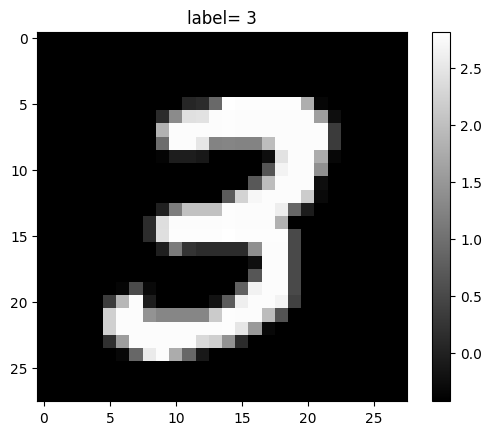

In [7]:
index=7
plt.imshow(x_train[index] , cmap='gray')
plt.colorbar()
plt.title(f'label= {y_train[index]}')
plt.show()

# Import layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense , Dropout

# Model Building

In [9]:
model =Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile Model

In [11]:
model.compile(loss = SparseCategoricalCrossentropy(),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

# Checking GPU Availability and Configuring TensorFlow Session


In [12]:
# Not necessary

# import tensorflow as tf
# if tf.config.list_physical_devices('GPU'):
#     print('GPU is available.')
# else:
#     print('GPU is NOT available. ')


# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)

GPU is available.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

# Training the Model 


In [15]:
history = model.fit(x_train,y_train,epochs=50 , batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0536 - val_accuracy: 0.9905
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0918 - val_accuracy: 0.9872
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0587 - val_accuracy: 0.9912
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0524 - val_accuracy: 0.9923
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0671 - val_accuracy: 0.9891
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0521 - val_accuracy: 0.9912
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0616 - val_accuracy:

# Model Evaluation

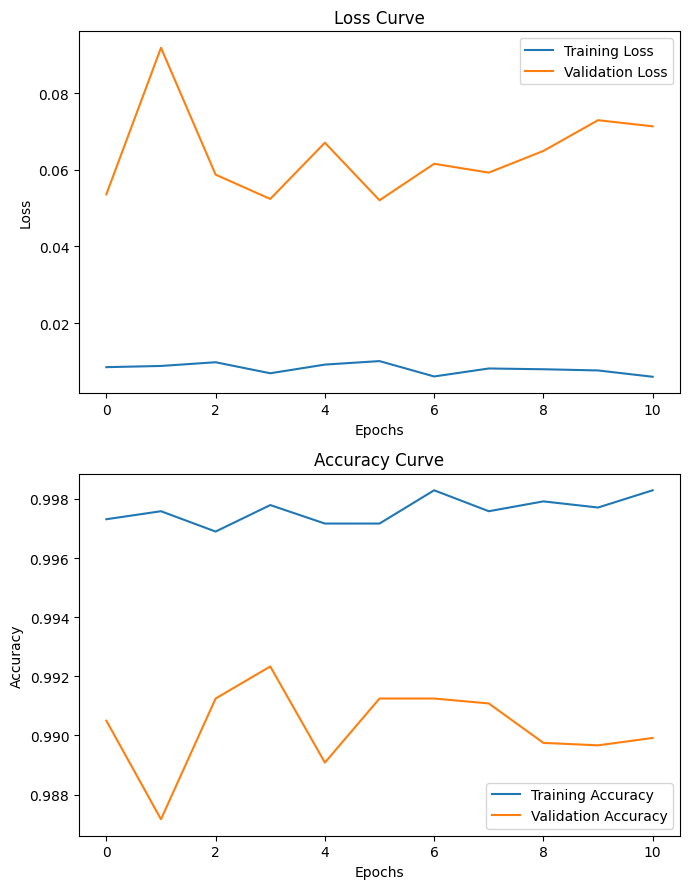

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(7, 9))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

In [17]:
predictions = model.predict(x_test)
print(predictions)

[[4.7072292e-29 2.3421913e-20 3.1621182e-21 ... 1.0000000e+00
  2.2464036e-29 1.8820207e-17]
 [9.0803335e-17 7.5436500e-15 1.0000000e+00 ... 9.3340295e-20
  1.5850982e-25 4.0615308e-26]
 [2.2733991e-33 1.0000000e+00 1.8948242e-22 ... 7.3997857e-27
  1.6389518e-22 1.2556735e-31]
 ...
 [2.2126248e-27 3.1262234e-19 1.0756184e-21 ... 4.8905188e-17
  1.4883248e-16 5.5190145e-21]
 [5.1290398e-37 4.7183208e-37 0.0000000e+00 ... 0.0000000e+00
  2.6707479e-27 8.4234787e-31]
 [1.7412312e-22 1.3120001e-23 1.8184284e-23 ... 0.0000000e+00
  1.0782806e-21 7.6500288e-31]]


In [27]:
print(np.argmax(predictions[0]))

7


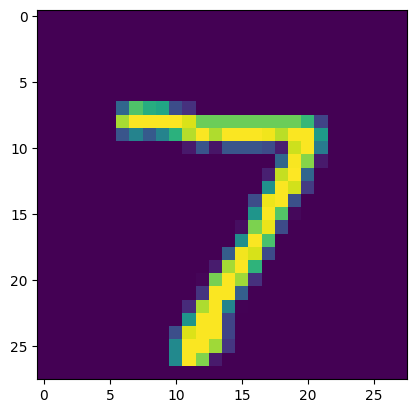

In [28]:
plt.imshow(x_test[0])
plt.show()


# Final Test

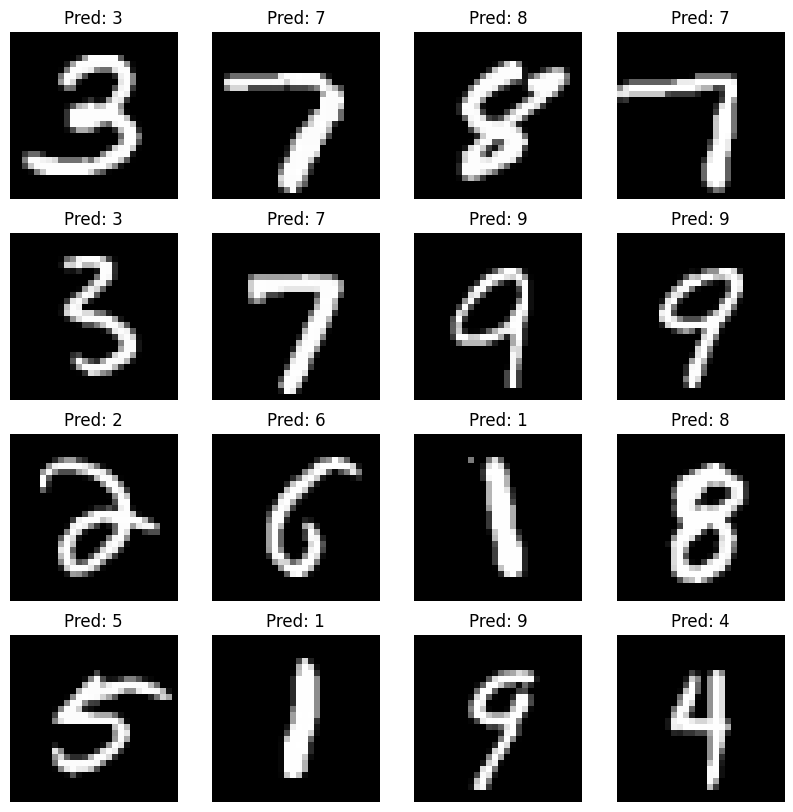

In [41]:
plt.figure(figsize=(10, 10))
random_indices = np.random.choice(x_test.shape[0], 16, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    plt.title(f'Pred: {predicted_label}')
    plt.axis('off')
plt.show()

# Save the trained model

In [42]:
model.save('mnist_model.h5')